## Introducción al Deep Learning - Feed-Forward Network

Arquitectura

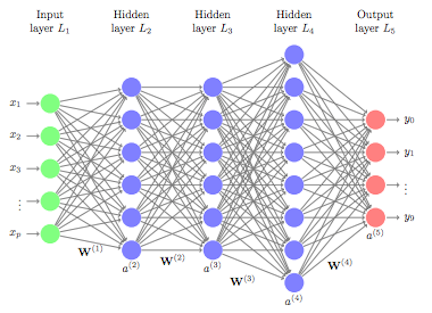

Librería


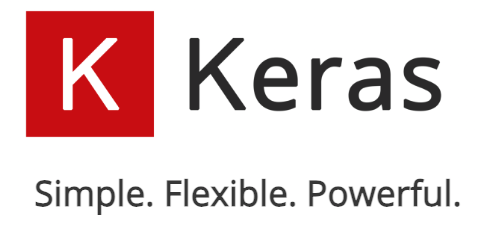


¿Qué es Keras?

- API de redes neuronales en Python.
- Modular, rápida y fácil de usar.
- Módulos totalmente configurables para crear nuevos modelos.
- Facilita la creación de capas y configuración de arquitecturas complejas.
- Soporte para varios back-ends: TensorFlow, CNTK, Theano, MXNet y PlaidML.
- Compatible con diversas opciones de despliegue en producción.
- Admite uso de varias GPU y entrenamiento distribuido.


In [3]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse

Definición de los metodos

In [4]:
def plot_grid(X, y, grid_size, labelNames):# Define the grid size
    # Create a figure to hold the images
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 10))

    for i in range(grid_size):
        for j in range(grid_size):
            # Calculate the index into the image array
            index = i * grid_size + j
            
            # Display the image
            axes[i, j].imshow(X[index], cmap='gray')
            
            # Remove the axis
            axes[i, j].axis('off')
            
            # Add a title with the label from y_train
            axes[i, j].set_title(f'Label: {labelNames[y[index][0]]}')

    # Show the plot
    plt.show()


def print_metrics(predictions, X_test, y_test, labelNames, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Loading the CIFAR-10 Dataset

In [5]:
# Cargamos el dataset usando la API de Keras
print("[INFO] loading CIFAR-10 data...")
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

[INFO] loading CIFAR-10 data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Analizamos los tamaños del dataset

In [6]:
print("Tamaño de X_train: ", X_train.shape[0])
print("Tamaño de X_test: ", X_test.shape[0])

print("Tamaño total del dataset: ", X_train.shape[0] + X_test.shape[0])


print("Porcentaje de datos de entrenamiento: ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Porcentaje de datos de test: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))


Tamaño de X_train:  50000
Tamaño de X_test:  10000
Tamaño total del dataset:  60000
Porcentaje de datos de entrenamiento:  0.8333333333333334
Porcentaje de datos de test:  0.16666666666666666


In [7]:
# Obtenemos los nombres de las clases de la base de datos
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

print("Número de clases en el dataset: ", len(labelNames))

Número de clases en el dataset:  10


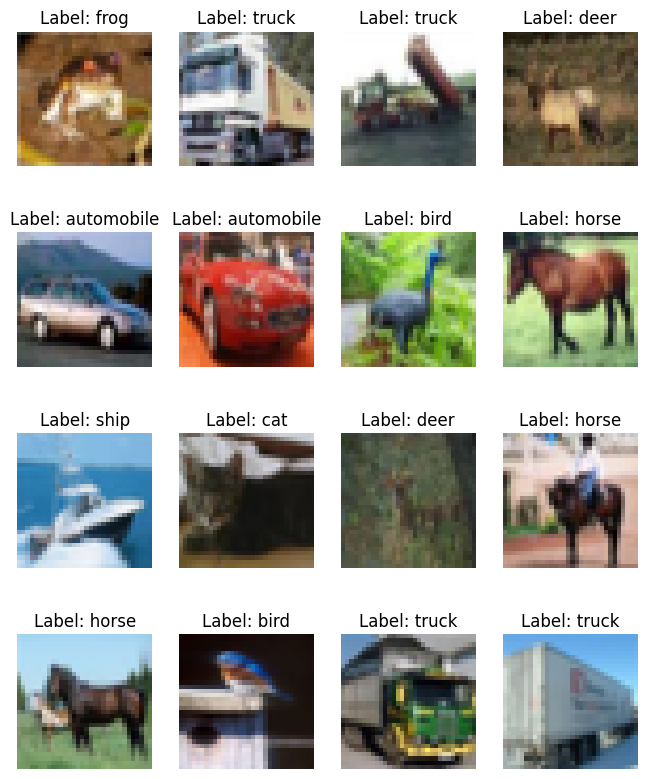

In [8]:
plot_grid(X_train, y_train, 4, labelNames)

Preparación de los datos de entrada

In [9]:
# Normalizamos los valores de la imagenes entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
print("Tamaño de la imagen", X_train[0].shape)
print("---------")
print("Tamaño del vector de la imagen", X_train[0].shape[0] * X_train[0].shape[1] * X_train[0].shape[2])
print("Tamaño del vector de la imagen", X_train[0].flatten().shape[0])

Tamaño de la imagen (32, 32, 3)
---------
Tamaño del vector de la imagen 3072
Tamaño del vector de la imagen 3072


In [11]:
# Convertimos las imagenes (matrices) en vectores planos de 3072 elementos
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))

In [12]:
# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print(f"Nueva estructura de las etiquetas -> {y_test[0]}")

Nueva estructura de las etiquetas -> [0 0 0 1 0 0 0 0 0 0]


### Diseño de la Red Neuronal

Llegados a este punto, hemos preparado los datos de entrada, por lo que los requisitios para el diseño de la RN serán:

 - Debe tener **3072** neuronas en la capa de **entrada**
 - Debe tener **10** neuronas en la capa de **salida**
 - Necesitamos una función de activacion de clasificacion multicalse -> **softmax**


In [13]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\yera_\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.1962 - loss: 2.8323 - val_accuracy: 0.3183 - val_loss: 1.8822
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.3492 - loss: 1.8151 - val_accuracy: 0.3413 - val_loss: 1.8251
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.3948 - loss: 1.6919 - val_accuracy: 0.4077 - val_loss: 1.6489
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.4223 - loss: 1.6152 - val_accuracy: 0.3664 - val_loss: 1.7449
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.4386 - loss: 1.5717 - val_accuracy: 0.3878 - val_loss: 1.7022
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.4517 - loss: 1.5295 - val_accuracy: 0.3812 - val_loss: 1.7331
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.4662 - loss: 1.4953 - val_accuracy: 0.4541 - val_loss: 1.5329
Epoch 8/50
 26/334 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.4850 - loss: 1.4316

KeyboardInterrupt: 

##### Haciendo inferencia con el modelo entrenado

Usamos el modelo entrenado para precedir una imagen

Text(0.5, 1.0, 'frog')

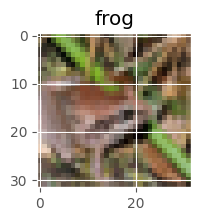

In [ ]:
# Visualizamos la imagen antes de la clasificacion

index = 96

plt.figure(figsize=(2,2))
plt.imshow(X_test[index].reshape(32, 32, 3))
plt.title(labelNames[y_test[index].argmax(axis=0)])

In [ ]:
# Pasamos la imagen al modelo para obtener la prediccion
prediction = model.predict(X_test[index].reshape(1, 3072))
prediction.argmax(axis=1)

print("Clase predicha para la imagen", labelNames[prediction.argmax(axis=1)[0]])

1/1 [==============================] - 0s 19ms/step
Clase predicha para la imagen deer


### Analizando el entrenamiento

In [ ]:
predictions = model.predict(X_test, batch_size=150)

print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

67/67 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    airplane       0.57      0.53      0.55      1000
  automobile       0.59      0.73      0.65      1000
        bird       0.26      0.67      0.37      1000
         cat       0.52      0.12      0.19      1000
        deer       0.38      0.51      0.44      1000
         dog       0.54      0.30      0.38      1000
        frog       0.50      0.62      0.56      1000
       horse       0.82      0.34      0.48      1000
        ship       0.66      0.64      0.65      1000
       truck       0.74      0.35      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.56      0.48      0.48     10000
weighted avg       0.56      0.48      0.48     10000



              precision    recall  f1-score   support

    airplane       0.57      0.53      0.55      1000
  automobile       0.59      0.73      0.65      1000
        bird       0.26      0.67      0.37      1000
         cat       0.52      0.12      0.19      1000
        deer       0.38      0.51      0.44      1000
         dog       0.54      0.30      0.38      1000
        frog       0.50      0.62      0.56      1000
       horse       0.82      0.34      0.48      1000
        ship       0.66      0.64      0.65      1000
       truck       0.74      0.35      0.48      1000

    accuracy                           0.48     10000
   macro avg       0.56      0.48      0.48     10000
weighted avg       0.56      0.48      0.48     10000



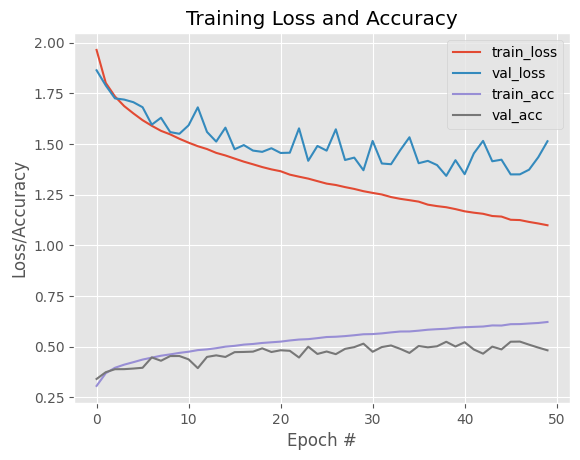

In [ ]:
print_metrics(predictions, X_test, y_test, labelNames, H, 50)

Entrenamos el modelo con 500 epocas

In [ ]:
## Entrenamos el modelo con mas epocas

H = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=500, batch_size=150)

Epoch 1/500
334/334 [==============================] - 4s 11ms/step - loss: 1.0803 - accuracy: 0.6248 - val_loss: 1.4537 - val_accuracy: 0.4903
Epoch 2/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0719 - accuracy: 0.6309 - val_loss: 1.5050 - val_accuracy: 0.4861
Epoch 3/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0726 - accuracy: 0.6286 - val_loss: 1.3248 - val_accuracy: 0.5277
Epoch 4/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0605 - accuracy: 0.6336 - val_loss: 1.3521 - val_accuracy: 0.5280
Epoch 5/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0500 - accuracy: 0.6387 - val_loss: 1.2931 - val_accuracy: 0.5449
Epoch 6/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0404 - accuracy: 0.6394 - val_loss: 1.3309 - val_accuracy: 0.5248
Epoch 7/500
334/334 [==============================] - 3s 9ms/step - loss: 1.0322 - accuracy: 0.6424 - val_loss: 1.3343 - val_accuracy: 0.534

67/67 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    airplane       0.65      0.63      0.64      1000
  automobile       0.68      0.65      0.67      1000
        bird       0.49      0.44      0.47      1000
         cat       0.39      0.43      0.41      1000
        deer       0.52      0.48      0.50      1000
         dog       0.46      0.47      0.46      1000
        frog       0.60      0.61      0.60      1000
       horse       0.60      0.61      0.61      1000
        ship       0.67      0.72      0.69      1000
       truck       0.60      0.62      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



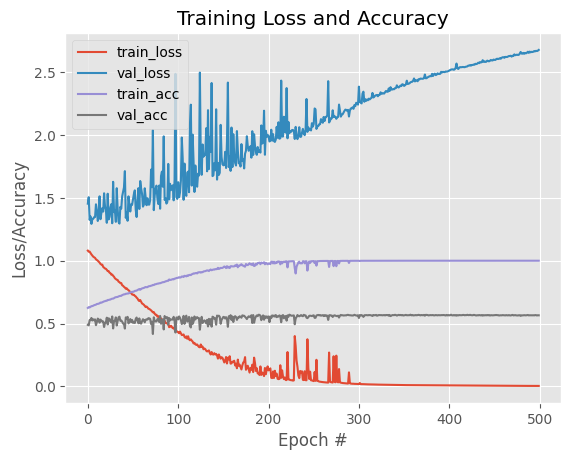

In [ ]:
predictions = model.predict(X_test, batch_size=150)
print_metrics(predictions, X_test, y_test, labelNames, H, epochs=500)

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))

In [ ]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=150)

Epoch 1/50
334/334 [==============================] - 4s 11ms/step - loss: 2.2067 - accuracy: 0.1949 - val_loss: 2.0075 - val_accuracy: 0.3092
Epoch 2/50
334/334 [==============================] - 4s 11ms/step - loss: 2.0304 - accuracy: 0.2593 - val_loss: 1.8995 - val_accuracy: 0.3346
Epoch 3/50
334/334 [==============================] - 3s 10ms/step - loss: 1.9627 - accuracy: 0.2858 - val_loss: 1.8504 - val_accuracy: 0.3539
Epoch 4/50
334/334 [==============================] - 3s 10ms/step - loss: 1.9172 - accuracy: 0.3071 - val_loss: 1.8108 - val_accuracy: 0.3633
Epoch 5/50
334/334 [==============================] - 3s 10ms/step - loss: 1.8834 - accuracy: 0.3238 - val_loss: 1.7801 - val_accuracy: 0.3832
Epoch 6/50
334/334 [==============================] - 3s 10ms/step - loss: 1.8557 - accuracy: 0.3334 - val_loss: 1.7514 - val_accuracy: 0.3869
Epoch 7/50
334/334 [==============================] - 3s 10ms/step - loss: 1.8344 - accuracy: 0.3439 - val_loss: 1.7237 - val_accuracy: 0.3926

67/67 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    airplane       0.61      0.52      0.56      1000
  automobile       0.61      0.64      0.63      1000
        bird       0.36      0.28      0.31      1000
         cat       0.36      0.31      0.33      1000
        deer       0.45      0.42      0.43      1000
         dog       0.42      0.37      0.39      1000
        frog       0.40      0.75      0.52      1000
       horse       0.62      0.52      0.57      1000
        ship       0.61      0.66      0.63      1000
       truck       0.61      0.51      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



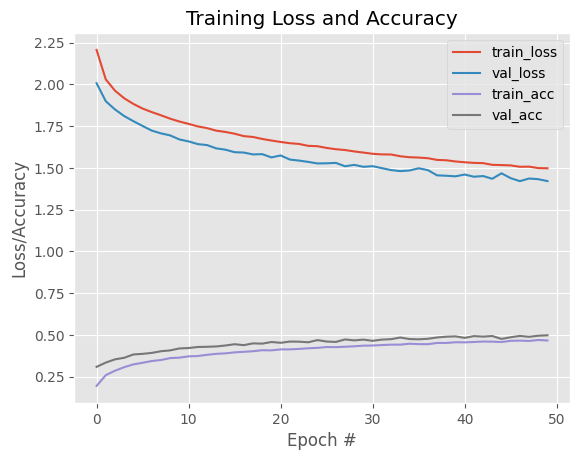

In [ ]:
predictions = model.predict(X_test, batch_size=150)
print_metrics(predictions, X_test, y_test, labelNames, H, epochs=50)

### Playground

In [ ]:
model_pg = Sequential()
model_pg.add(Dense(12, input_shape=(3072,), activation="relu"))
model_pg.add(Dropout(0.9))
model_pg.add(Dense(512, activation="relu"))
model_pg.add(Dropout(0.78))
model_pg.add(Dense(256, activation="relu"))
model_pg.add(Dropout(0.9))
model_pg.add(Dense(10, activation="softmax"))

In [ ]:
sgd = SGD(0.01)
model_pg.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model_pg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=150)

Epoch 1/25
334/334 [==============================] - 4s 12ms/step - loss: 2.5596 - accuracy: 0.1037 - val_loss: 2.3025 - val_accuracy: 0.1052
Epoch 2/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3084 - accuracy: 0.1009 - val_loss: 2.3025 - val_accuracy: 0.1062
Epoch 3/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3058 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1048
Epoch 4/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3052 - accuracy: 0.1012 - val_loss: 2.3025 - val_accuracy: 0.1044
Epoch 5/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3042 - accuracy: 0.0991 - val_loss: 2.3025 - val_accuracy: 0.1046
Epoch 6/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3040 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.1036
Epoch 7/25
334/334 [==============================] - 4s 11ms/step - loss: 2.3043 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy: 0.1048

67/67 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.26      0.01      0.03      1000
        bird       0.00      0.00      0.00      1000
         cat       0.16      0.01      0.01      1000
        deer       0.10      0.99      0.18      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.05      0.10      0.02     10000
weighted avg       0.05      0.10      0.02     10000



/home/coder/repos/audio-ai-poc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/coder/repos/audio-ai-poc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/coder/repos/audio-ai-poc/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

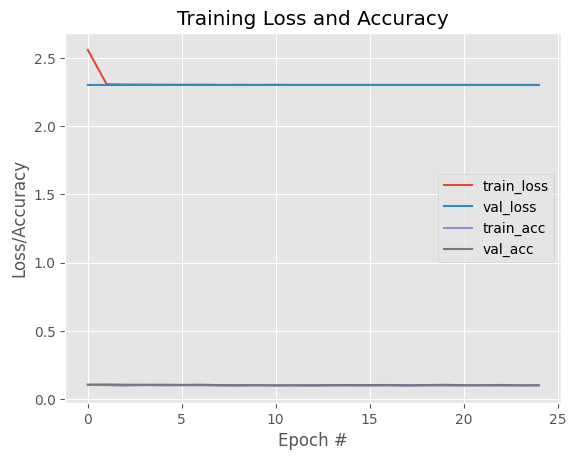

In [ ]:
predictions_pg = model_pg.predict(X_test, batch_size=150)
print_metrics(predictions_pg, X_test, y_test, labelNames, H, epochs=25)